<h1>Welcome to The Computer Vision Workshop</h1>
<h2> Chapter 2: Common Operations When Working with Images</h2>


<p>In this chapter, we will take a look at geometric transformations – <b>rotation, translation, scaling, affine transformation</b>, and <b>perspective transformation</b>. We will crop images using NumPy and OpenCV functions. Then, we will discuss binary images and how to carry out arithmetic operations on images. We will have a look at some real-life applications where these techniques can come in handy.</p>

In [1]:
# Import modules
import numpy as np

In [3]:
# Specify the 3 points that we want to translate
points = np.array([[2,0,1],
                  [3,0,2],
                  [1,1,1]])
print(points)

[[2 0 1]
 [3 0 2]
 [1 1 1]]


<h4>Image Operation: Translation</h4>

In [5]:
# Output points - using manual calculation
outPoints = np.array([[2 + 2, 0 + 2, 1 + 2],
            [3 + 3, 0 + 3, 2 + 3],
            [1, 1, 1]])
print(outPoints)

[[4 2 3]
 [6 3 5]
 [1 1 1]]


<h4>Image Operation: Translation using Matrix Multiplication</h4>

In [6]:
# Move by 2 units along x direction
a = 2
# Move by 3 units along y direction
b = 3

# Translation matrix: Identity Matrix with embedded translation value
# M = np.float32( [[1,0,tx], [0,1,ty]] )
# tx, ty represents the translation in x and y directions, respectively
M = np.array([[1,0,a],[0,1,b],[0,0,1]])
print(M)

[[1 0 2]
 [0 1 3]
 [0 0 1]]


In [7]:
# Perform translation using NumPy
output = M@points
print(output)

[[4 2 3]
 [6 3 5]
 [1 1 1]]


<h4>Image Operation: Rotation</h4>
<ul> specify the angle as:
<li>positive if it's anti-clockwise </li>
<li>negative if it's specified in the clockwise direction</li>
</ul>

<h4>Image Operation: Resizing</h4>
<ul> We will stick to the following three interpolations for resizing:
<li> If we are shrinking an image, we will use bilinear interpolation. This is represented as <code>cv2.INTER_AREA</code> in OpenCV.</li>
<li>If we are increasing the size of an image, we will use either linear interpolation (<code>cv2.INTER_LINEAR</code>) or cubic interpolation (<code>cv2.INTER_CUBIC</code>).</li>
</ul>
Let's look at how we can resize an image using OpenCV's <code>cv2.resize</code> function:</br>
<code>cv2.resize(src, dsize, fx, fy, interpolation)</code>

<h4>Affine Transformation</h4>
<p><b>Affine transformation</B> is one of the most important geometric transformations in computer vision. Because, affine transformation can combine the effects of translation, rotation, and resizing into one transform.</p>
<code>cv2.warpAffine(src, M, dsize)</code>

In [10]:
# Load modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

dir = "The-Computer-Vision-Workshop/Chapter02/data/"

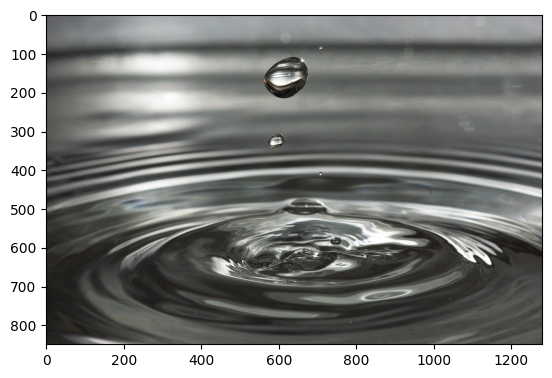

In [19]:
# Load and show image
img = cv2.imread(dir + "drip.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

In [20]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Get image shape
height,width = img.shape

<h4> Translation</h4>

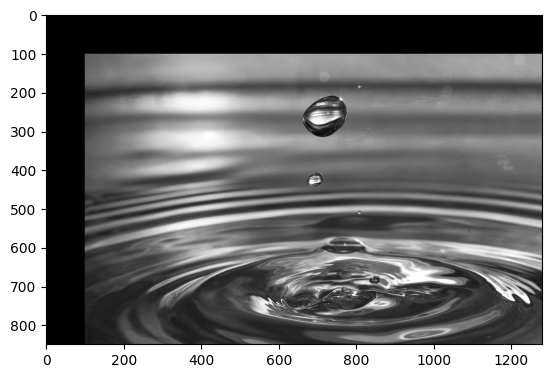

In [21]:
# Translation
tx = 100
ty = 100
M = np.float32([[1,0,tx],[0,1,ty]])
dst = cv2.warpAffine(img,M,(width,height))
plt.imshow(dst,cmap="gray")
plt.show()

<h4> Rotation</h4>

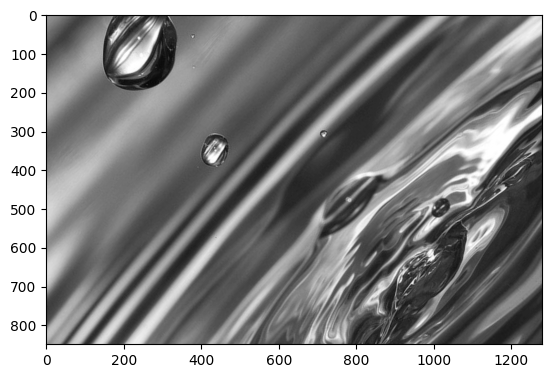

In [22]:
# Rotation
angle = 45
center = (width//2, height//2)
scale = 2
M = cv2.getRotationMatrix2D(center,angle,scale)
dst = cv2.warpAffine(img,M,(width,height))
plt.imshow(dst,cmap="gray")
plt.show()

<h4> Resizing</h4>

In [23]:
# Resizing image
print(f"Width of image = {width}, Height of image = {height}")

dst = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
height, width = dst.shape
print(f"Width of image = {width}, Height of image = {height}")

Width of image = 1280, Height of image = 849
Width of image = 2560, Height of image = 1698


<h3>Perspective Transformation</h3>

In [24]:
# Import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

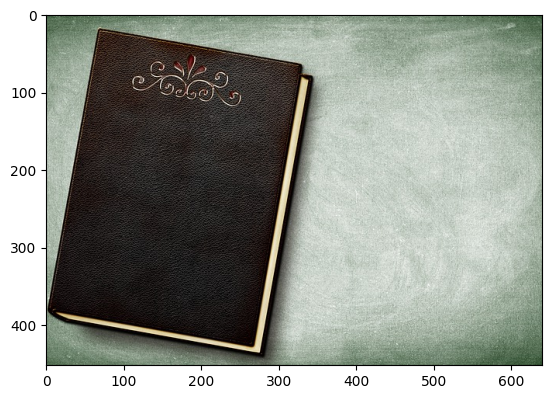

In [25]:
dir = "The-Computer-Vision-Workshop/Chapter02/data/"
img = cv2.imread(dir + "book.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

In [26]:
# Specifying four poins for the transformation
inputPts = np.float32([[4,381],    # bottom-left
                      [266,429],   # bottom-right
                      [329,68],    # top-right
                      [68,20]])    # top-left
outputPts = np.float32([[0,300],
                       [300,300],
                       [300,0],
                       [0,0]])

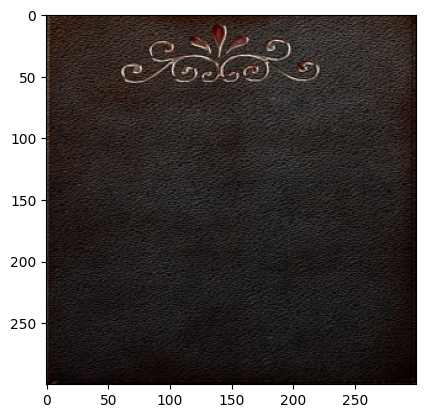

In [27]:
# Next, obtain the transformation matrix:
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply this transformation matrix to carry out perspective transformation:
dst = cv2.warpPerspective(img,M,(300,300))
plt.imshow(dst[:,:,::-1])
plt.show()

<h3>Image Arithmetic</h3>

<h3>a) Image Addition</h3>
<p>the pixel values in images are represented using unsigned 8-bit integers, and that's why the range of pixel values is from 0 to 255. If the value after addition lies outside of the range (0-255), two things can happen:
<ul>
<li>The value will be clipped to a maximum value. This means that 420 will be revised to 255.</li>
<li>The value will follow a cyclic order or a modulo operation.</li> 
</ul>
</p>

In [28]:
# # Addition using Opencv: it will add the value to only the first (blue) channel
# dst = cv2.add(src1, src2)

# # Addition using Numpy: it will distribute the value to each of the channels
# dst = src1 + src2

In [29]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

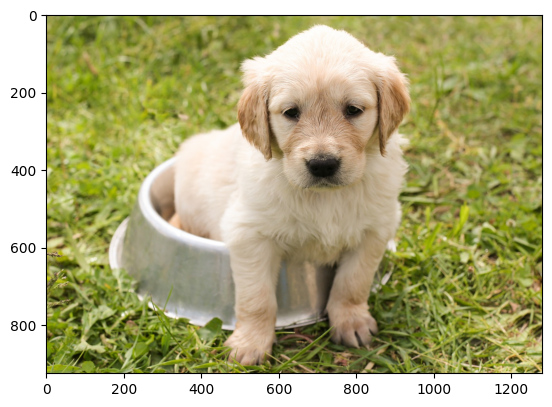

In [30]:
dir = "The-Computer-Vision-Workshop/Chapter02/data/"
# Read image
img = cv2.imread(dir + "puppy.jpg")
# Display image
plt.imshow(img[:,:,::-1])
plt.show()

<h5>Numpy Addition</h5>
<p>modulo operation being performed by NumPy on the new pixel values. <i>NumPy's approach is not the recommended approach to use while dealing with adding a constant value to an image. </i></p>


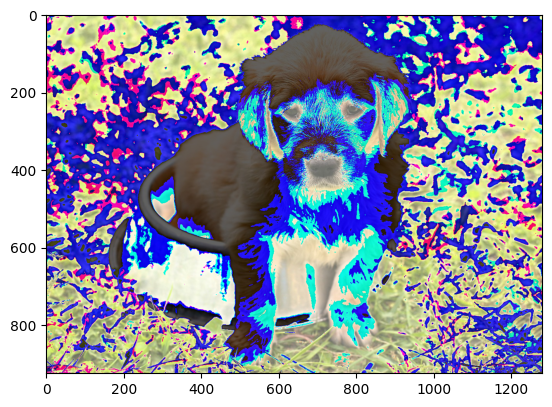

In [32]:
# Add 100 to the image
numpyImg = img+100
# Display image
plt.imshow(numpyImg[:,:,::-1])
plt.show()

<h5>OpenCV Addition</h5>


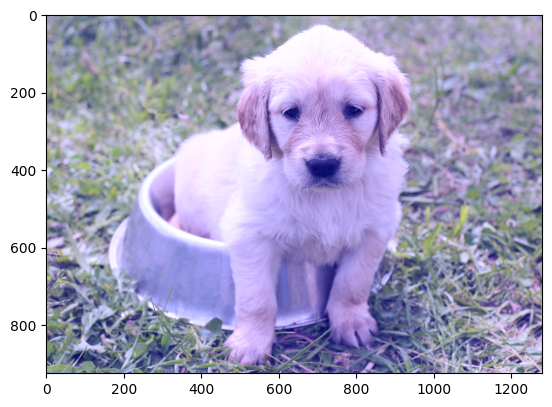

In [33]:
# Using OpenCV
opencvImg = cv2.add(img,100)  # there is an increased blue tone to the image
# Display image               # the value 100 has only been added to the first channel of the image
plt.imshow(opencvImg[:,:,::-1])
plt.show()

<h4> How to correctly use openCV Addition</h4>

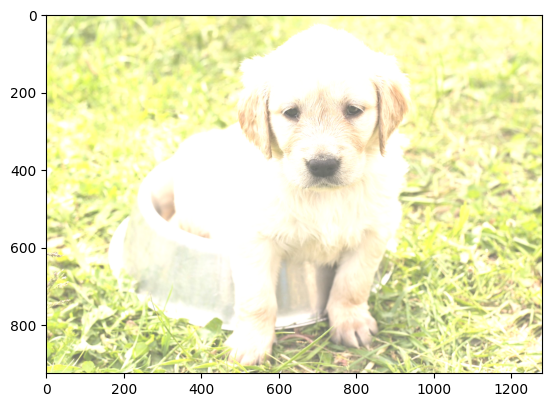

In [36]:
h, w, c = img.shape
# create an image that's the same shape as the original image and add the value 100 to every channel of the original image
nparr = np.ones((h, w, c),dtype=np.uint8) * 100

# Add nparr to the image and visualize the result:
opencvImg = cv2.add(img,nparr)
# Display image
plt.imshow(opencvImg[:,:,::-1])
plt.show()

<h4> Check the same approach with Numpy</h4>

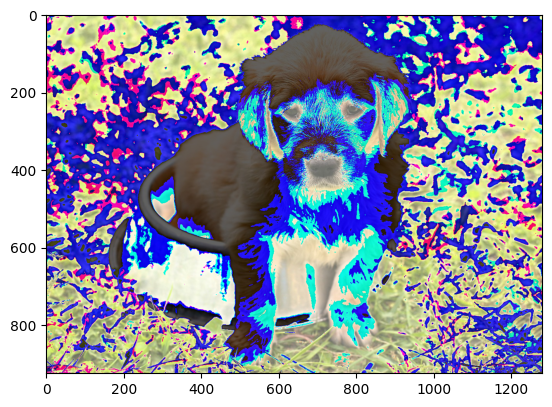

In [37]:
npImg = img + nparr
# Display image
plt.imshow(npImg[:,:,::-1])
plt.show()

<h3>b) Image Multiplication</h3>
<p>Image multiplication is very similar to image addition and can be carried out using OpenCV's <code>cv2.multiply</code> function (recommended)</br>
We can use the <code>cv2.multiply</code> function as follows:
</br>
<code>dst = cv2.Mul(src1, src2)</code>
</p>

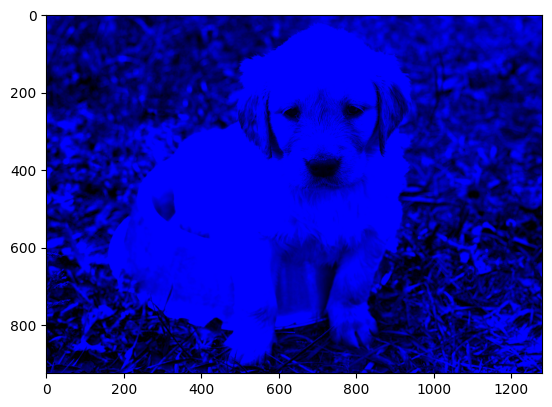

In [38]:
# Multiply the image by 2 using the cv2.multiply function:
cvImg = cv2.multiply(img,2) 
plt.imshow(cvImg[:,:,::-1])
plt.show()

<h3>c) Binary Images</h3>
<p>Binary images need only a single bit to represent a pixel value. These images are commonly used as masks for selecting or removing a certain region of an image.
</br>
Now, let's see how we can convert an image into a binary image. This technique comes under the category of thresholding.
</br>
We can convert an image into a binary image using the following code:
<code>
# Set threshold and maximum value
thresh = 125
maxValue = 255
# Binary threshold on the grayscale image
th, dst = cv2.threshold(img, thresh, maxValue, \
                        cv2.THRESH_BINARY)
</code>
</p>

In [ ]:
# Import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

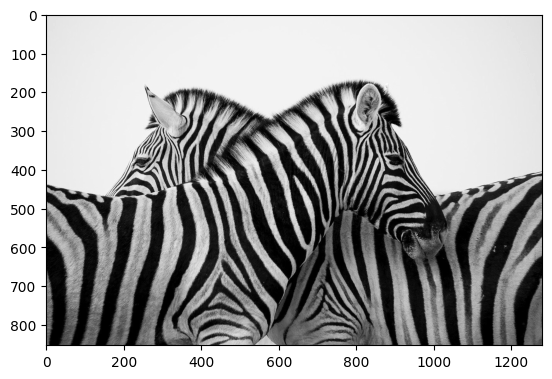

In [39]:
dir = "The-Computer-Vision-Workshop/Chapter02/data/"
img = cv2.imread(dir + "zebra.jpg")
# Convert and Display the image into grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

In [40]:
# Use the cv2.thresholding function and set the threshold to 150
# Set threshold and maximum value
thresh = 150
maxValue = 255
# Binary threshold
th, dst = cv2.threshold(img, thresh, maxValue, \
                        cv2.THRESH_BINARY)

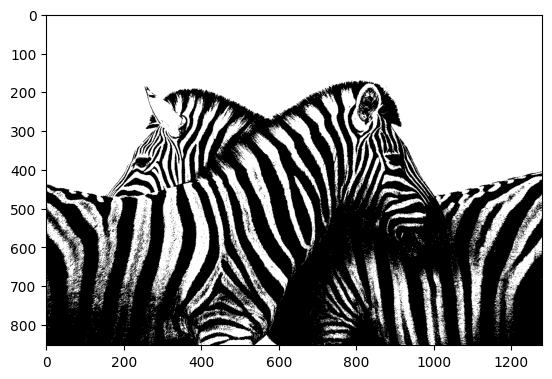

In [41]:
plt.imshow(dst, cmap='gray')
plt.show()

<h2>Bitwise Operations on Images</h2>
<p>In this exercise, we will use the XOR operation to find the chess pieces that have moved using two images taken of the same chess game.</p>

In [42]:
# Import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Read the images
img1 = cv2.imread(dir + "board.png")
img2 = cv2.imread(dir + "board2.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


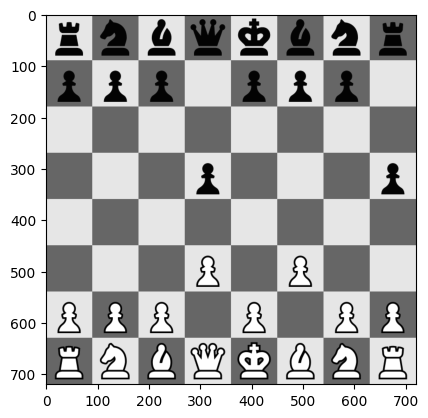

In [46]:
plt.imshow(img1,cmap="gray")
plt.show()

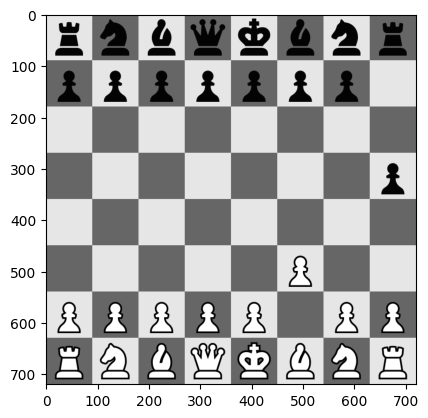

In [44]:
plt.imshow(img2,cmap="gray")
plt.show()

In [47]:
#     Threshold both the images using a threshold value of 150 and a maximum value of 255
# Set threshold and maximum value
thresh = 150
maxValue = 255

# Binary threshold
th, dst1 = cv2.threshold(img1, thresh, maxValue, \
                         cv2.THRESH_BINARY)

# Binary threshold
th, dst2 = cv2.threshold(img2, thresh, maxValue, \
                         cv2.THRESH_BINARY)

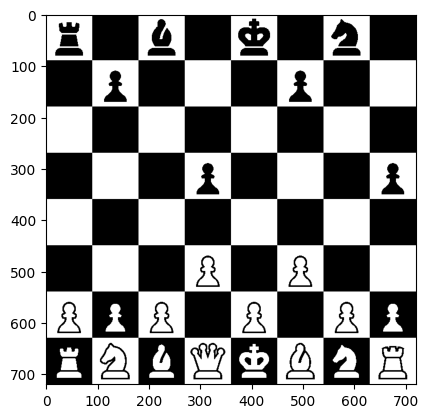

In [48]:
plt.imshow(dst1, cmap='gray')
plt.show()

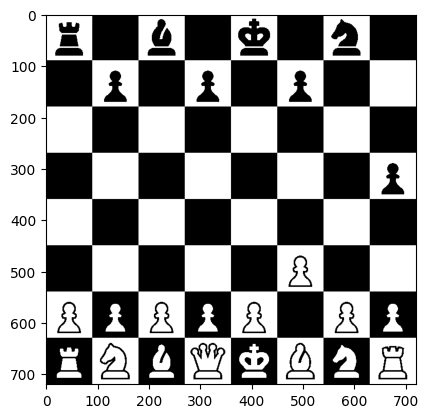

In [49]:
plt.imshow(dst2, cmap='gray')
plt.show()

<h4>Use bitwise <code>XOR</code> to find the pieces that have moved</h4>

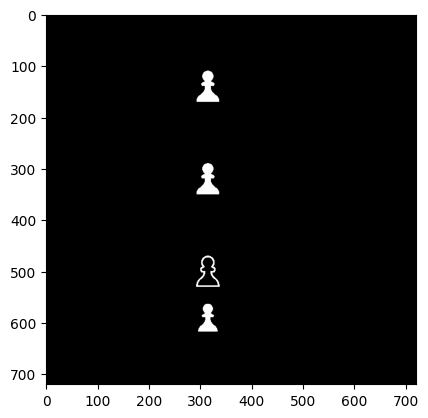

In [50]:
dst = cv2.bitwise_xor(dst1,dst2)
plt.imshow(dst, cmap='gray')
plt.show()

<h3>Masking</h3>
<p>Binary images are quite frequently used to serve as a mask.
Consider a pixel, <code>P</code>, at location <code>(x,y)</code>.
<ul>
<li>If the pixel, <code>P</code>, is white or non-zero (because zero refers to black), the pixel at location <code>(x,y)</code> will be left as it is.</li>
<li>If the pixel, <code>P</code>, was black or zero, the pixel at location <code>(x,y)</code>  will be replaced with <code>0</code>.</li>
</ul>
</p>


In [51]:
# Import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

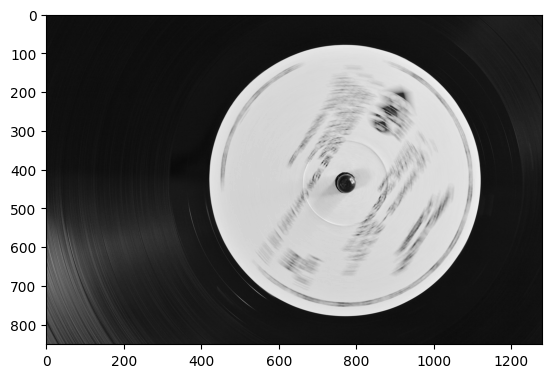

In [52]:
# Load the intended mask image
img = cv2.imread(dir + "recording.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

In [53]:
# Set threshold and maximum value
thresh = 150
maxValue = 255
# Binary threshold
th, dst = cv2.threshold(img, thresh, maxValue, \
          cv2.THRESH_BINARY)

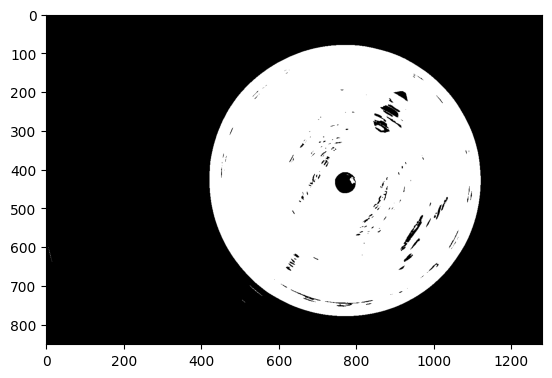

In [54]:
plt.imshow(dst, cmap='gray')
plt.show()

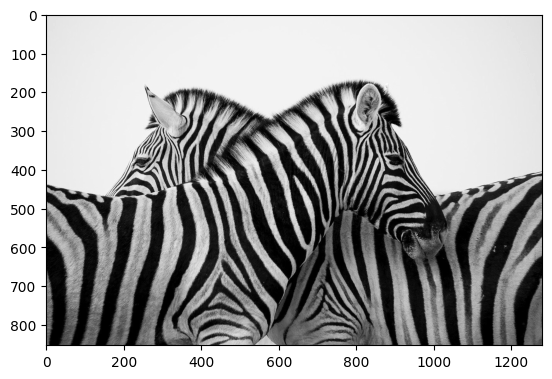

In [55]:
# foreground image
foreground = cv2.imread(dir + "zebra.jpg")
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
plt.imshow(foreground, cmap='gray')
plt.show()

In [56]:
# check dimensions of two images: foreground and mask and resize them to be the same dimension
fg_h, fg_w = foreground.shape
bg_h, bg_w = dst.shape

if (fg_h != bg_h) or (fg_w!=bg_w):
    # resize both to 800 px height and 1280 px width
    dst = cv2.resize(dst, (1280,800), \
                     interpolation = cv2.INTER_LINEAR)
    foreground = cv2.resize(foreground, (1280,800), \
                            interpolation = cv2.INTER_LINEAR)

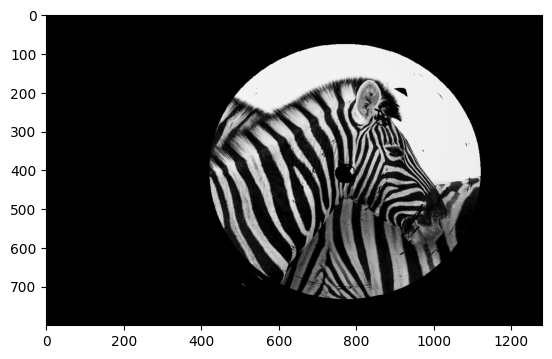

In [57]:
# use NumPy's where function to carry out masking and display the result
result = np.where(dst, foreground, 0)
plt.imshow(result, cmap='gray')
plt.show()